<a href="https://colab.research.google.com/github/donw385/DS-Unit-2-Sprint-2-Linear-Regression/blob/master/module4-Model%20Diagnostics/Model_Diagnostics_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model Diagnostics

The purpose of this assigment is introduce you to a new library for linear regression called statmodels which is much better suited for inferential modeling than sklearn. This assignment is also to familiarize yourself with some of most important procedures for improving the interpretability of regression coefficients. You will also perform important statistical tests that will help establish that whether or not important assumptions that safeguard the interpretability of OLS coefficients have been met. 

We will continue to use the Ames Housing Dataset so that you can focus on the techniques and not on cleaning/getting associated with a brand new dataset.

## 1.1 Choose an X and Y variable from your dataset and use them to create a Seaborn Regplot

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy import stats

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [20]:
df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/kc_house_data.csv")
df = df.drop(['id','date','zipcode','lat','long','yr_renovated'], axis=1)

df.head()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,1800,7503


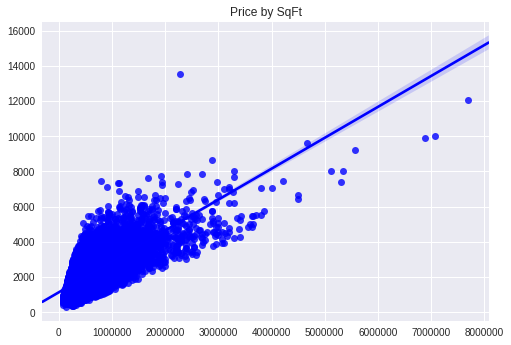

In [3]:
prices = np.array(df['price'])
living = np.array(df['sqft_living'])

fig = sns.regplot(prices, living, color='blue').set_title('Price by SqFt')

## 1.2 Now using the X variables that you feel like will be the best predictors of y use statsmodel to run the multiple regression between these variables and Y. You don't need to use every X variable in your dataset, in fact it's probably better if you don't. Just pick ones that you have already cleaned that seem the most relevant to house prices.

In [4]:

X = df[['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront',  'condition', 'grade', 'sqft_basement', 'yr_built']] 

y = df['price']

# This is like using np.ones to add a vector of ones
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     3937.
Date:                Thu, 21 Feb 2019   Prob (F-statistic):               0.00
Time:                        19:55:46   Log-Likelihood:            -2.9639e+05
No. Observations:               21613   AIC:                         5.928e+05
Df Residuals:                   21602   BIC:                         5.929e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.589e+06   1.31e+05     50.243

## 1.3 Identify the standard errors and P-Values of these coefficients in the output table. What is the interpretation of the P-values here?

In [0]:
# The p-value for each term tests the null hypothesis that the coefficient is equal to zero (no effect). A low p-value (< 0.05) 
# indicates that you can reject the null hypothesis. In other words, a predictor that has a low p-value is likely to be a meaningful 
# addition to your model because changes in the predictor's value are related to changes in the response variable.


# std is standard error

## 1.4 Remove outliers from your dataset and run the regression again. Do you see a change in some coefficients? Which seem to move the most?

In [23]:
# # Lets remove outliers 

# df_new = df[['bedrooms', 'bathrooms', 'sqft_living',
#        'sqft_lot', 'floors', 'waterfront',  'condition', 'grade', 'sqft_basement', 'yr_built','price']] 

print(df.shape)

df_new = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

print(df_new.shape)

(21613, 15)
(19628, 15)


In [24]:
X = df_new[['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront',  'condition', 'grade', 'sqft_basement', 'yr_built']] 

y = df_new['price']

# This is like using np.ones to add a vector of ones
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.573
Method:                 Least Squares   F-statistic:                     2925.
Date:                Thu, 21 Feb 2019   Prob (F-statistic):               0.00
Time:                        20:07:27   Log-Likelihood:            -2.6221e+05
No. Observations:               19628   AIC:                         5.244e+05
Df Residuals:                   19618   BIC:                         5.245e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.336e+06   9.92e+04     53.807

In [0]:
# all moved substantially except grade and condition

## 1.5 Create a new log(y) variable and use it to run a log-linear regression of your variables using statmodels 

In [25]:
df_new['ln_price'] = np.log(df_new['price'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [30]:
X = df_new[['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront',  'condition', 'grade', 'sqft_basement', 'yr_built']] 

y = df_new['ln_price']

# This is like using np.ones to add a vector of ones
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     2772.
Date:                Thu, 21 Feb 2019   Prob (F-statistic):               0.00
Time:                        20:16:52   Log-Likelihood:                -4678.7
No. Observations:               19628   AIC:                             9377.
Df Residuals:                   19618   BIC:                             9456.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            21.8134      0.199    109.769

## 2.1 Run a test for high levels of collinearity in your dataset. Calculate the Variance Inflation Factor for each X variable. Do you see VIF values greater than ten? If so try omitting those X variables and run your regression again. Do the standard errors change? Do the coefficients change? Do the coefficients seem to have an interpretation that matches your intuition?

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

print(X.columns, '\n\n')

vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

#waterfront is nan, doesnt change output

Index(['const', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'sqft_basement', 'yr_built'],
      dtype='object') 


[8214.245306736519, 1.6943031668690007, 3.0076860370758545, 4.045049227331283, 1.1283519115120608, 2.0114348919232468, nan, 1.1994103570157542, 2.497010147657055, 1.6574551052141422, 1.8782253464772647]


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1386: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [28]:
X = df_new[['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'condition', 'grade', 'sqft_basement', 'yr_built']] 

y = df_new['ln_price']

# This is like using np.ones to add a vector of ones
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     2772.
Date:                Thu, 21 Feb 2019   Prob (F-statistic):               0.00
Time:                        20:14:48   Log-Likelihood:                -4678.7
No. Observations:               19628   AIC:                             9377.
Df Residuals:                   19618   BIC:                             9456.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            21.8134      0.199    109.769

## 2.2 Variables that have high levels of multicollinearity should also be highly correlated with each other. Calculate your X matrix's correlation matrix to check if the variables highlighted by the VIF test truly are highly correlated.

In [31]:
no_const = X.drop('const', axis=1)
no_const.corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_basement,yr_built
bedrooms,1.000000,0.493379,0.608228,0.103306,0.166501,NaN,0.022108,0.333969,0.275338,0.167137
bathrooms,0.493379,1.000000,0.712664,0.057161,0.517027,NaN,-0.143999,0.617101,0.209021,0.547884
sqft_living,0.608228,0.712664,1.000000,0.220521,0.361725,NaN,-0.074589,0.706916,0.346771,0.347315
sqft_lot,0.103306,0.057161,0.220521,1.000000,-0.098440,NaN,0.039000,0.131567,0.038688,0.030672
floors,0.166501,0.517027,0.361725,-0.098440,1.000000,NaN,-0.279074,0.472125,-0.293306,0.507556
waterfront,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
condition,0.022108,-0.143999,-0.074589,0.039000,-0.279074,NaN,1.000000,-0.177021,0.183872,-0.369451
grade,0.333969,0.617101,0.706916,0.131567,0.472125,NaN,-0.177021,1.000000,0.053650,0.478221
sqft_basement,0.275338,0.209021,0.346771,0.038688,-0.293306,NaN,0.183872,0.053650,1.000000,-0.164882
yr_built,0.167137,0.547884,0.347315,0.030672,0.507556,NaN,-0.369451,0.478221,-0.164882,1.000000


## 2.3 If you have varaibles with high Variance Inflation Factors, try excluding them from your regression. Do your standard errors improve? (get smaller). If high levels of multicollinearity are removed, the precision of the dataset should increase.

In [0]:
#not applicable

## 2.4 Recalculate your regression using Robust Standard Errors? What happens to your standard errors?

In [32]:
#SE increases

# Lets run our regression again using Robust Standard Errors
# cov_type='HC3' parameter to .fit() function

# Log-Linear Regression

X = df_new[['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'condition', 'grade', 'sqft_basement', 'yr_built']] 

y = df_new['ln_price']

# This is like using np.ones to add a vector of ones
X = sm.add_constant(X)

model = sm.OLS(y, X).fit(cov_type='HC3')
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)


                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     2806.
Date:                Thu, 21 Feb 2019   Prob (F-statistic):               0.00
Time:                        20:18:14   Log-Likelihood:                -4678.7
No. Observations:               19628   AIC:                             9377.
Df Residuals:                   19618   BIC:                             9456.
Df Model:                           9                                         
Covariance Type:                  HC3                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            21.8134      0.200    109.290

## 2.5 Use scatterplots or Seaborn's pairplot functionality to perform an eyeball test for potential variables that would be candidates for generating polynomial regressors. 

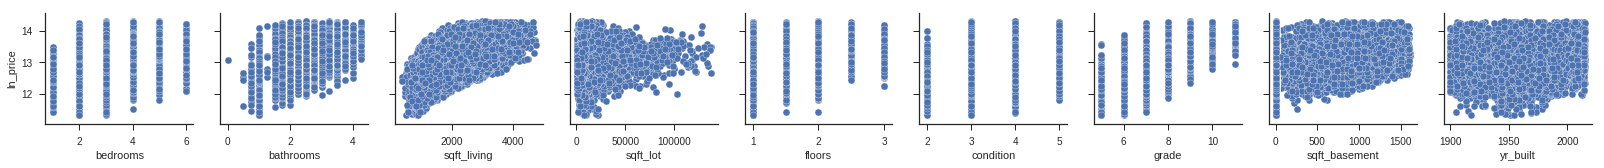

In [35]:
sns.set(style="ticks", color_codes=True)

# Generate a list of column headers not including price
x_columns = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'condition', 'grade', 'sqft_basement', 'yr_built']

# Only plot the scatterplot of x variables with our y variable
fig = sns.pairplot(data=df_new, y_vars=['ln_price'], x_vars=x_columns)

# sqft_living, sqft_lot, sqft_basement

## 2.6 Use seaborn's residplot to plot the distribution of each x variable's residuals. Does these plots indicate any other features that would be potential candidates for polynomial features.

IndexError: ignored

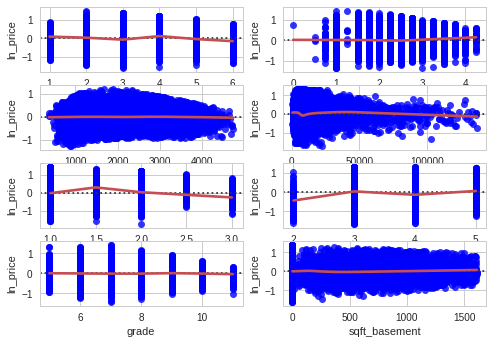

In [39]:
# any bowing in our residuals is cause for concern.

sns.set(style="whitegrid")
fig, axs = plt.subplots(ncols=2,nrows=4)
sns.residplot(X['bedrooms'], y, lowess=True, color="r", ax=axs[0][0], scatter_kws={'color':'blue'})
sns.residplot(X['bathrooms'], y, lowess=True, color="r", ax=axs[0][1], scatter_kws={'color':'blue'})
sns.residplot(X['sqft_living'], y, lowess=True, color="r", ax=axs[1][0], scatter_kws={'color':'blue'})
sns.residplot(X['sqft_lot'], y, lowess=True, color="r", ax=axs[1][1], scatter_kws={'color':'blue'})
sns.residplot(X['floors'], y, lowess=True, color="r", ax=axs[2][0], scatter_kws={'color':'blue'})
sns.residplot(X['condition'], y, lowess=True, color="r", ax=axs[2][1], scatter_kws={'color':'blue'})
sns.residplot(X['grade'], y, lowess=True, color="r", ax=axs[3][0], scatter_kws={'color':'blue'})
sns.residplot(X['sqft_basement'], y, lowess=True, color="r", ax=axs[3][1], scatter_kws={'color':'blue'})
sns.residplot(X['yr_built'], y, lowess=True, color="r", ax=axs[4][0], scatter_kws={'color':'blue'})




## 2.6 Feature Engineer the appropriate polynomial features from your analysis above and include them in one final log-polynomial, robust standard error, regression. Do the coefficients of this most advanced regression match your intuition better than the coefficients of the very first regression that we ran with the Statmodels library?

In [0]:
##### Your Code Here #####